In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.stats import kurtosis,skew

from matplotlib.colors import LinearSegmentedColormap

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families

from dython.nominal import associations

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Campus Placement.csv')
data

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
data.rename(columns={'specialisation':'mba_t'}, inplace=True)

In [5]:
data.fillna(0,inplace=True)

#### Function for value counts

In [6]:
def valueCounts(lst):
    for i in lst:
        print(i)
        print(data[i].value_counts())
        print('')

#### status

In [7]:
valueCounts(['status'])

status
Placed        148
Not Placed     67
Name: status, dtype: int64



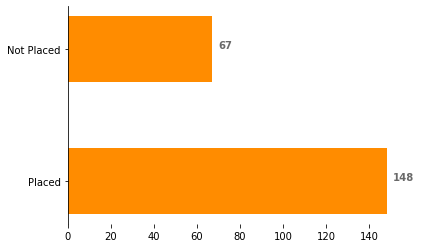

In [8]:
fig, ax = plt.subplots()

ax. spines["right"].set_visible(False)
ax. spines["top"].set_visible(False)
ax. spines["bottom"].set_visible(False)

width = 0.5
x = data['status'].value_counts().index
y = data['status'].value_counts().values
 
ax.barh(x, y, width, color = "darkorange")
 
for i, v in enumerate(y):
    ax.text(v + 3, i + .005, str(v),
            color = 'dimgray', fontweight = 'bold')
plt.show()

### salary

<AxesSubplot:xlabel='salary', ylabel='Density'>

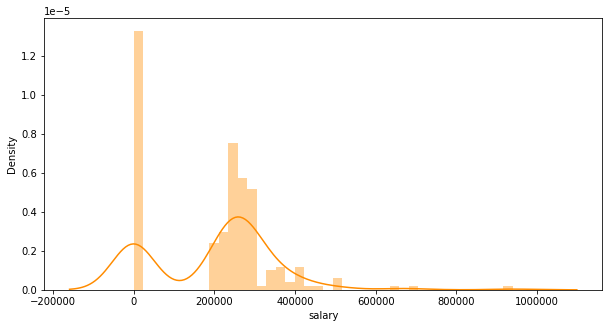

In [9]:
fig = plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(data.salary, hist=True, bins = 40, color = 'darkorange')

The 0's in data is disturbing the graph. So, let's take them out.

In [10]:
df = data[data['salary'] != 0]

<AxesSubplot:xlabel='salary', ylabel='Density'>

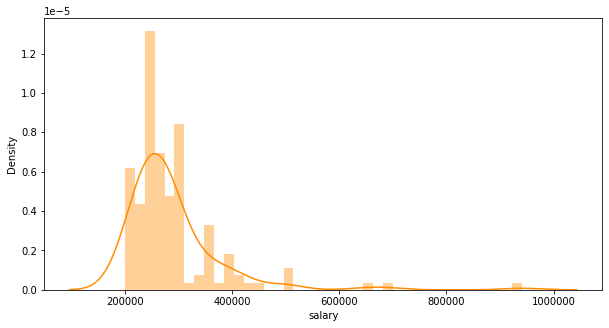

In [11]:
fig = plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(df.salary, hist=True, bins = 40, color = 'darkorange')

The graph is extended in the right side with a very flat tail. Let's check them to confirm if they're outliers.

In [12]:
df[df['salary'] > 500000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
119,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


They look like outliers[119, 150, 177]. Now let's see the graph without them

In [13]:
df1 = df[df['salary']<510000]

<AxesSubplot:xlabel='salary', ylabel='Density'>

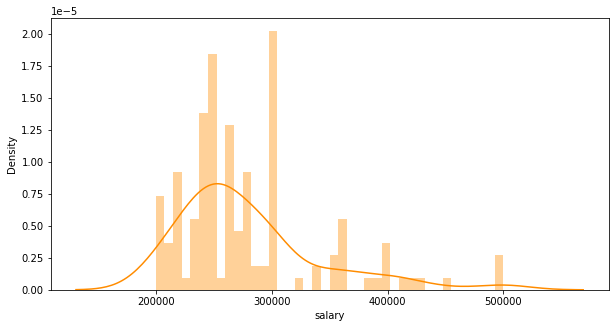

In [14]:
fig = plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(df1.salary, hist=True, bins = 40, color = 'darkorange')

First, let's just focus on the histogram ignoring the kde line 
1. From 200k to 300k the graph rises and falls very steaply.
2. Sharply at 300k there is an abnormal frequency of students.
3. Again, from 300k to 450k, we see a small hill.
4. Finally, at 500k there is a good rise.     

The first point is normal but, The other three points are to be focused and summarized.

<AxesSubplot:xlabel='salary', ylabel='Density'>

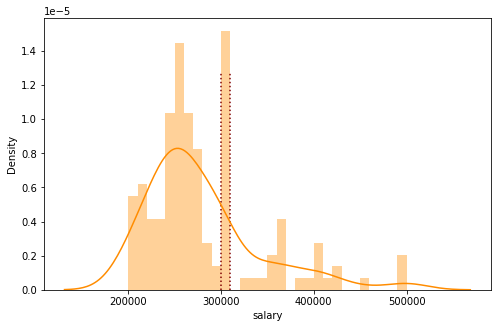

In [15]:
plt.figure(figsize=(8, 5))
plt.axvline(x=300000, ymin=0.0, ymax=0.8, ls='dotted', color='maroon', label='Central',linewidth = 1.5)
plt.axvline(x=310000, ymin=0.0, ymax=0.8, ls='dotted', color='maroon', label='Central',linewidth = 1.5)
sns.distplot(df1.salary, hist=True, bins = 30, color = 'darkorange')

we got the limits

In [16]:
d = df1[df1['salary'] >= 300000]
d[d['salary']<=310000].shape

(22, 14)

From 300k to 450k, the small hill might be due to some groups

In [17]:
df[df['salary'] == 500000]

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,mba_t,mba_p,status,salary
77,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
163,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
174,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0


This is only rise of 3 records, So, lets just leave it as it is.

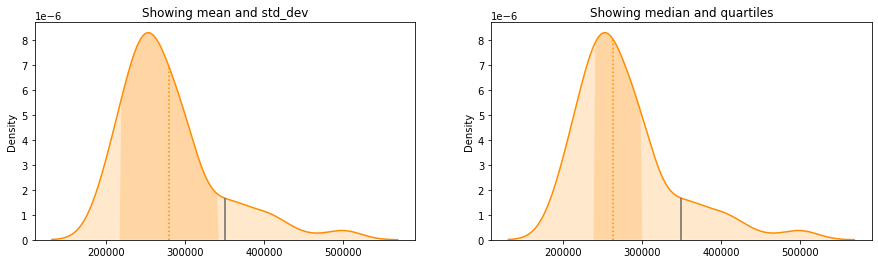

In [18]:
x = df1.salary.values
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))
for ax in axes:
    sns.kdeplot(x, shade=False, color='darkorange', ax=ax)
    kdeline = ax.lines[0]
    xs = kdeline.get_xdata()
    ys = kdeline.get_ydata()
    if ax == axes[0]:
        middle = x.mean()
        sdev = x.std()
        left = middle - sdev
        right = middle + sdev
        ax.set_title('Showing mean and std_dev')
    else:
        left, middle, right = np.percentile(x, [25, 50, 75])
        ax.set_title('Showing median and quartiles')
    ax.vlines(middle, 0, np.interp(middle, xs, ys), color='darkorange', ls=':')
    center_value = (((max(df1.salary) - min(df1.salary))/2)+min(df1.salary))
    ax.vlines(center_value, 0, np.interp(center_value, xs, ys), color='dimgray', ls='-')
    ax.ticklabel_format(style='plain', axis = 'x')
    ax.fill_between(xs, 0, ys, facecolor='darkorange', alpha=0.2)
    ax.fill_between(xs, 0, ys, where=(left <= xs) & (xs <= right), interpolate=True, facecolor='darkorange', alpha=0.2)
    # ax.set_ylim(ymin=0)
plt.show()

- Mean and Median are far from each other
- the center value(gray line) is very well right shifted, which tells us the graph is shifted to the left
- we expect 3 different groups to be involved in the graph because, there are 3 peaks

In [19]:
print('min:          ',min(df1.salary))
print('max:          ',max(df1.salary))
print('center value: ',(((max(df1.salary) - min(df1.salary))/2)+min(df1.salary)))
print('mean:         ', df1.salary.mean())
print('median:       ',df1.salary.median())
print('mode:       ',df1.salary.mode())

min:           200000.0
max:           500000.0
center value:  350000.0
mean:          278903.4482758621
median:        264000.0
mode:        0    300000.0
dtype: float64


In [20]:
print('skewedness = ',round(skew(df1.salary.values, axis=0, bias=True),2))
print('kurtosis = ', round(kurtosis(df1.salary.values, fisher=False),2))

skewedness =  1.48
kurtosis =  5.33


#### Norms for normal distribution
- skewedness = 0
- kurtosis = 3

#### Our graph result
- As 1.48 > 0, very well left skewed
- as 5.33 > 3, very sharp peak and very thin tails

<AxesSubplot:xlabel='salary'>

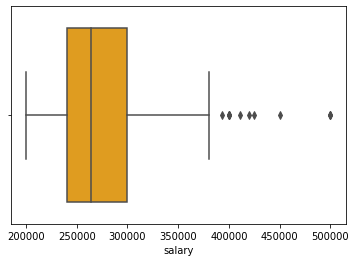

In [21]:
sns.boxplot(df1.salary,color = 'orange')

## **Assumptions**

## cramer's V
- #### Categorical to Categorical

  - [x] Sensitive to, 
    - [x]  Larger dataset
        - Considerably good dataset
    - [x]  Small dataset
        - Considerably good dataset
    - [x] Skewed dataset
        - Not highly skewed
- [x] Should not have large no of categories
    - Doesn't have many no of categories
- [x] It is Symmetrical (No differenciation between **independent** and **dependent**)
    - We can use Theil's U for it be work in asymmetric manner
        - We'll see both

## Logistic Regression
- #### Categorical(DV) to Continuous(IV)

- [x] Binary logistic regression requires the dependent variable to be binary.
    - It is binary
- [x] Only the meaningful variables should be included.
- [x] Affected by strongly influencial outliers
    - There are no influencial outliers
- [x] The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
    - Very less colinearity between columns(As seen in the pairplot)
- [x] The independent variables are linearly related to the log odds.
     - We'll check them during the course
- [x] Logistic regression requires quite large sample sizes.
    - It is a good dataset

## Pearson's Correlation coeficient
- #### Continuous to Continuous

- [ ] No distiguishing between independent and dependent
- [ ] It cannot determine the nonlinear relationships between variables
- [ ] Sensitive to outliers
- [ ] Sensitive to high Skewedness and high Kurtosis
- [x] Should be towards normal 
    - [ ] Can use Spearman instead(Does not assume normality)

## Anova
- #### Continuous(DV) to Categorical(IV)

- [ ] One-way Anova only for single dependent variable
- [ ] It can tell us one pair is significant but, cannot tell which one is!
- [ ] Normal Distribution within groups
- [ ] Sample's standard deviation's should not have a large difference
- [ ] Samples to be independent, if not do repeated tests

In [22]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'mba_t', 'mba_p', 'status', 'salary'],
      dtype='object')

### Create Dummies

In [23]:
data_copy = data.copy()

cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data_copy[var], prefix=var)
    data1=data_copy.join(cat_list)
    data_copy = data1
    
cat_vars=['gender', 'ssc_b', 'hsc_b', 'hsc_s','degree_t', 'workex', 'mba_t']
data_vars=data_copy.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [24]:
data_final=data_copy[to_keep]
data_final.columns

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'salary',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin',
       'mba_t_Mkt&HR'],
      dtype='object')

### SMOTE

In [25]:
X = data_final[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin',
       'mba_t_Mkt&HR']]

y = data_final['status']

In [26]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# we can Check the numbers of our data
print("length of data before oversampling is ",len(X_train))
print("length of data after oversampling is ",len(os_data_X))
print('')
print("Number of Placed in data before oversampling is ", len(y_train[y_train=='Placed']))
print("Number of Not Placed in data before oversampling is ", len(y_train[y_train=='Not Placed']))
print('')
print("Number of Placed in oversampled data",len(os_data_y[os_data_y['y']=='Placed']))
print("Number of Not Placed in oversampled data",len(os_data_y[os_data_y['y']=='Not Placed']))
print('')
print("Proportion of Placed data in oversampled data is ",len(os_data_y[os_data_y['y']=='Placed'])/len(os_data_X))
print("Proportion of Not Placed data in oversampled data is ",len(os_data_y[os_data_y['y']=='Not Placed'])/len(os_data_X))

length of data before oversampling is  150
length of data after oversampling is  204

Number of Placed in data before oversampling is  102
Number of Not Placed in data before oversampling is  48

Number of Placed in oversampled data 102
Number of Not Placed in oversampled data 102

Proportion of Placed data in oversampled data is  0.5
Proportion of Not Placed data in oversampled data is  0.5


In [27]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(150, 21) (65, 21)
(150,) (65,)


In [28]:
print(os_data_X.shape)
print(os_data_y.shape)

(204, 21)
(204, 1)


# STATUS Dependecies

## Logistic Regression

### Checking Linearity with log-odds for only Continuous variables 

In [29]:
X1 = data_final[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin',
       'mba_t_Mkt&HR']].copy()  # lt = logit transform

# Define continuous variables
continuous_var = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Age * Log(Age)
for var in continuous_var:
    X1[f'{var}:Log_{var}'] = X1[var].apply(lambda x: x * np.log(x)) #np.log = natural log

X1.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,...,degree_t_Sci&Tech,workex_No,workex_Yes,mba_t_Mkt&Fin,mba_t_Mkt&HR,ssc_p:Log_ssc_p,hsc_p:Log_hsc_p,degree_p:Log_degree_p,etest_p:Log_etest_p,mba_p:Log_mba_p
0,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,...,1,1,0,0,1,281.714405,410.488215,235.505695,220.403325,239.559541
1,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,...,1,0,1,1,0,346.958986,341.591699,337.039537,385.802492,277.970909
2,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,...,0,1,0,1,0,271.335173,286.926524,266.168517,323.811609,234.493951
3,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,...,1,1,0,0,1,225.419695,205.464673,205.464673,276.517213,242.759613
4,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,...,0,1,0,1,0,381.983231,316.380274,314.791293,442.632229,222.909258


In [30]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + X1.columns.tolist()[-len(continuous_var):]
cols_to_keep

['ssc_p',
 'hsc_p',
 'degree_p',
 'etest_p',
 'mba_p',
 'ssc_p:Log_ssc_p',
 'hsc_p:Log_hsc_p',
 'degree_p:Log_degree_p',
 'etest_p:Log_etest_p',
 'mba_p:Log_mba_p']

In [31]:
dataset = data_final['status'].replace('Not Placed', 0).replace('Placed', 1)

In [32]:
dataset

0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 215, dtype: int64

In [33]:
# Redefine independent variables to include interaction terms
X_lt = X1[cols_to_keep]
y_lt = dataset

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)
  
# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 status   No. Observations:                  215
Model:                            GLM   Df Residuals:                      204
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.291
Date:                Thu, 14 Jul 2022   Deviance:                       124.58
Time:                        15:30:53   Pearson chi2:                     146.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4838
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ssc_p                    -0.33

We're concentrating on the P values here,
- There is no values under P which are below 0.05, which tells us no columns is going through any non linearirity and there is no statistical significance anywhere
> - Which inturn adheres to the assumptions.

### RFE with all variables(Smote data)

In [34]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 1)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False False False False  True False False False False]
[ 8 11 20 16 10 18 19  6  5 12 14  7 13 15  2 21  1  9  3  4 17]


In [35]:
rank_series = rfe.ranking_.tolist()
col_series = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin',
       'mba_t_Mkt&HR']

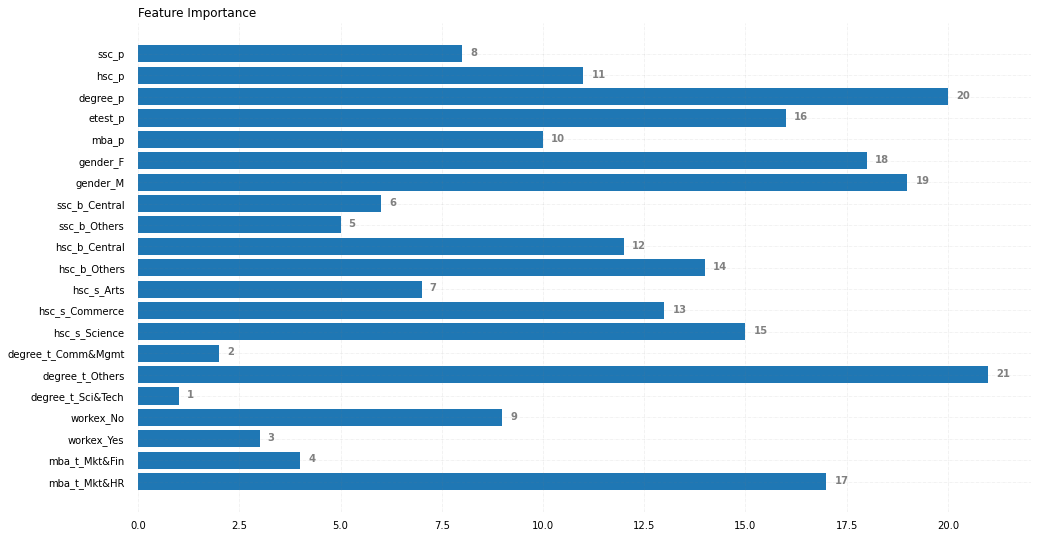

In [36]:
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(col_series, rank_series)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Feature Importance',
             loc ='left', )
 
# Show Plot
plt.show()

In [37]:
all_top_15 = ['degree_t_Sci&Tech','degree_t_Comm&Mgmt','workex_Yes', 'mba_t_Mkt&Fin', 'ssc_b_Others', 'ssc_b_Central', 'hsc_s_Arts', 'ssc_p', 'workex_No', 'mba_p', 'hsc_p', 'hsc_b_Central', 'hsc_s_Commerce', 'hsc_b_Others', 'hsc_s_Science']
all_top_15

['degree_t_Sci&Tech',
 'degree_t_Comm&Mgmt',
 'workex_Yes',
 'mba_t_Mkt&Fin',
 'ssc_b_Others',
 'ssc_b_Central',
 'hsc_s_Arts',
 'ssc_p',
 'workex_No',
 'mba_p',
 'hsc_p',
 'hsc_b_Central',
 'hsc_s_Commerce',
 'hsc_b_Others',
 'hsc_s_Science']

### RFE with only Categorical variable(Smote data)

In [38]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 1)
os_data_X_cat = os_data_X.iloc[:,5:]
rfe = rfe.fit(os_data_X_cat, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
 False False False False]
[10  9  8  7  5  4 13 12 11  2 15  1 16  3  6 14]


In [39]:
rank_series = rfe.ranking_.tolist()
col_series = ['gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin',
       'mba_t_Mkt&HR']

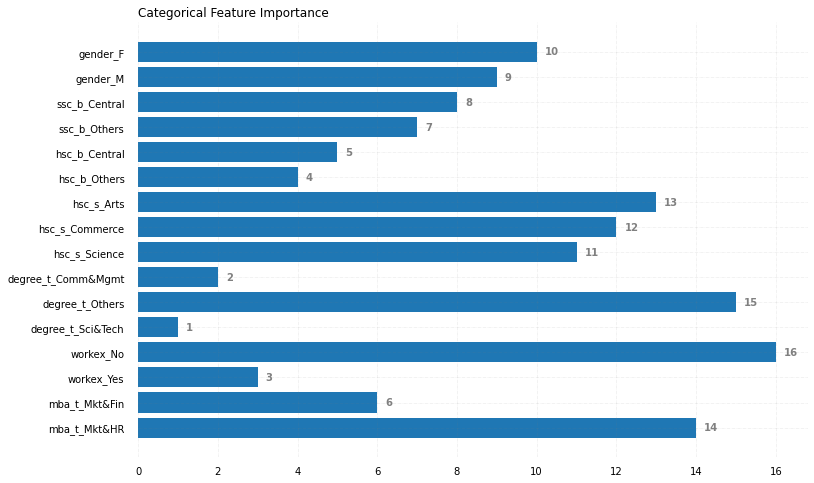

In [40]:
# Figure Size
fig, ax = plt.subplots(figsize =(12, 8))
 
# Horizontal Bar Plot
ax.barh(col_series, rank_series)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Categorical Feature Importance',
             loc ='left', )
 
# Show Plot
plt.show()

In [41]:
cat_top_10 = ['degree_t_Sci&Tech','degree_t_Comm&Mgmt','workex_Yes', 'hsc_b_Others', 'hsc_b_Central', 'mba_t_Mkt&Fin', 'ssc_b_Others', 'ssc_b_Central', 'gender_M' ,'gender_F']
cat_top_10

['degree_t_Sci&Tech',
 'degree_t_Comm&Mgmt',
 'workex_Yes',
 'hsc_b_Others',
 'hsc_b_Central',
 'mba_t_Mkt&Fin',
 'ssc_b_Others',
 'ssc_b_Central',
 'gender_M',
 'gender_F']

### RFE with only Continuous variable(Smote data)

In [42]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 1)
os_data_X_con = os_data_X.iloc[:,:5]
rfe = rfe.fit(os_data_X_con, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False]
[1 4 2 5 3]


In [43]:
rank_series = rfe.ranking_.tolist()
col_series = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

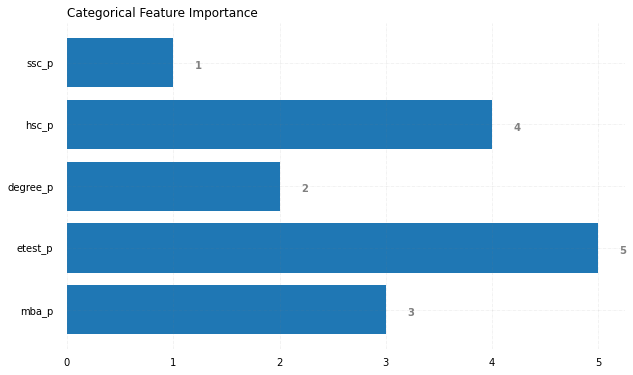

In [44]:
# Figure Size
fig, ax = plt.subplots(figsize =(10, 6))
 
# Horizontal Bar Plot
ax.barh(col_series, rank_series)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Categorical Feature Importance',
             loc ='left', )
 
# Show Plot
plt.show()

In [45]:
con_top = ['ssc_p', 'degree_p','mba_p', 'hsc_p', 'etest_p']
con_top

['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p']

### RFE with only Continuous variable(Normal data)

In [46]:
X = data_final[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p',
       'gender_F', 'gender_M', 'ssc_b_Central', 'ssc_b_Others',
       'hsc_b_Central', 'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce',
       'hsc_s_Science', 'degree_t_Comm&Mgmt', 'degree_t_Others',
       'degree_t_Sci&Tech', 'workex_No', 'workex_Yes', 'mba_t_Mkt&Fin',
       'mba_t_Mkt&HR']]

y = data_final['status']

In [47]:
data_final_vars=data_final.columns.values.tolist()

logreg = LogisticRegression()
rfe = RFE(estimator = logreg, n_features_to_select = 1)
X_con = X.iloc[:,:5]
rfe = rfe.fit(X_con, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False]
[1 4 3 5 2]


In [48]:
rank_series = rfe.ranking_.tolist()
col_series = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

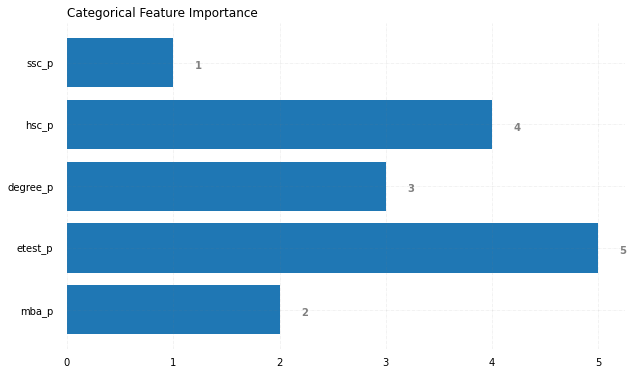

In [49]:
# Figure Size
fig, ax = plt.subplots(figsize =(10, 6))
 
# Horizontal Bar Plot
ax.barh(col_series, rank_series)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Categorical Feature Importance',
             loc ='left', )
 
# Show Plot
plt.show()

In [50]:
con_top = ['ssc_p','mba_p', 'degree_p', 'hsc_p', 'etest_p']
con_top

['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p']

## Cramer's V

#### dython library = https://github.com/shakedzy/dython/blob/master/docs/modules/nominal.md

In [51]:
dataset1 = data.iloc[:,[0,2,4,5,7,8,10,12]]

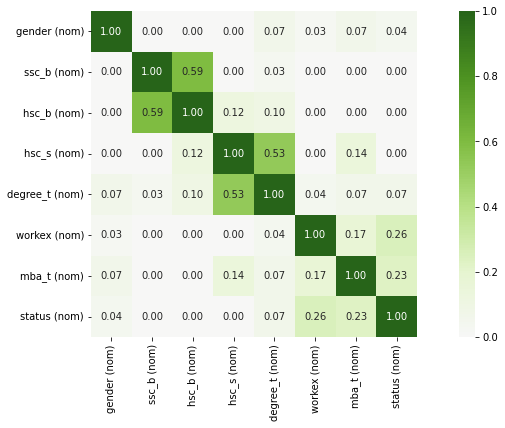

{'corr':                 gender (nom)  ssc_b (nom)  hsc_b (nom)  hsc_s (nom)  \
 gender (nom)        1.000000     0.000000     0.000000     0.000000   
 ssc_b (nom)         0.000000     1.000000     0.593778     0.000000   
 hsc_b (nom)         0.000000     0.593778     1.000000     0.124432   
 hsc_s (nom)         0.000000     0.000000     0.124432     1.000000   
 degree_t (nom)      0.066937     0.031800     0.096690     0.529416   
 workex (nom)        0.030717     0.000000     0.000000     0.000000   
 mba_t (nom)         0.068079     0.000000     0.000000     0.143933   
 status (nom)        0.041977     0.000000     0.000000     0.000000   
 
                 degree_t (nom)  workex (nom)  mba_t (nom)  status (nom)  
 gender (nom)          0.066937      0.030717     0.068079      0.041977  
 ssc_b (nom)           0.031800      0.000000     0.000000      0.000000  
 hsc_b (nom)           0.096690      0.000000     0.000000      0.000000  
 hsc_s (nom)           0.529416      0.000

In [52]:
associations(dataset1, nominal_columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s',
       'degree_t', 'workex', 'mba_t', 'status'], mark_columns=True,
             nom_nom_assoc='cramer', ax=None, figsize=(15,6), annot=True, fmt='.2f', 
             cmap='PiYG', sv_color='silver', cbar=True, vmax=1.0, vmin=0.00, plot=True, title=None)

Order of Significance
- [workex, mba_t, degree_t, gender]         
equal - [ssc_b, hsc_b, hsc_s]

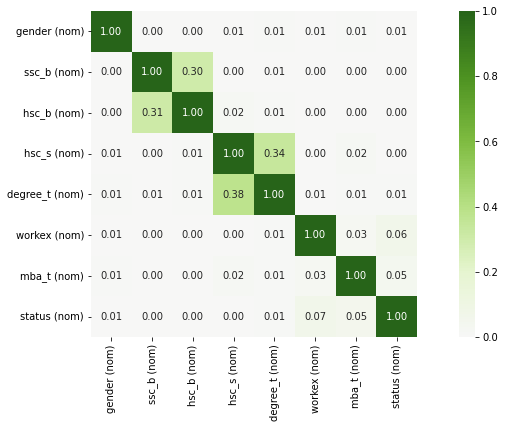

{'corr':                 gender (nom)  ssc_b (nom)  hsc_b (nom)  hsc_s (nom)  \
 gender (nom)        1.000000     0.000291     0.003331     0.006841   
 ssc_b (nom)         0.000274     1.000000     0.299906     0.002539   
 hsc_b (nom)         0.003234     0.309301     1.000000     0.018360   
 hsc_s (nom)         0.005203     0.002052     0.014383     1.000000   
 degree_t (nom)      0.008766     0.006688     0.011893     0.377405   
 workex (nom)        0.005710     0.001292     0.001147     0.003751   
 mba_t (nom)         0.008190     0.001939     0.000004     0.022016   
 status (nom)        0.006545     0.001123     0.000231     0.003936   
 
                 degree_t (nom)  workex (nom)  mba_t (nom)  status (nom)  
 gender (nom)          0.010426      0.005659     0.008654      0.006251  
 ssc_b (nom)           0.007488      0.001205     0.001929      0.001010  
 hsc_b (nom)           0.013734      0.001104     0.000004      0.000214  
 hsc_s (nom)           0.341401      0.002

In [53]:
associations(dataset1, nominal_columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s',
       'degree_t', 'workex', 'mba_t', 'status'], mark_columns=True,
             nom_nom_assoc='theil', ax=None, figsize=(15,6), annot=True, fmt='.2f', 
             cmap='PiYG', sv_color='silver', cbar=True, vmax=1.0, vmin=0.00, plot=True, title=None)

Though we've made both Cramer's V and Thiel's U, we can stick on with the results of Cramer's V. This is because, the symmetry is not broken in thiel's anyways. So, its better to consider Cramer's


# Salary

## Pearson's Coefficient Correlation

<AxesSubplot:>

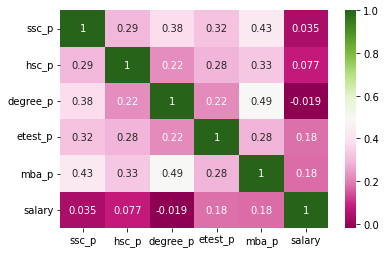

In [54]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap = 'PiYG')

## Spearman's Coefficient Correlation

<AxesSubplot:>

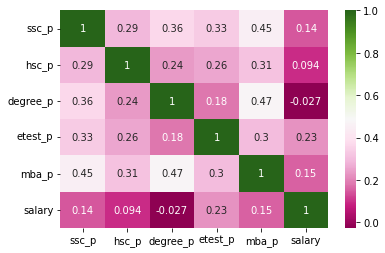

In [55]:
sns.heatmap(df.corr(method='spearman'), annot=True, cmap = 'PiYG')

Considering both the correlation matrix, the values we obtained are almost giving the same order according to coefficients but,
- As far as the dependent variable salary is considered to not be in normal distribution, Spearman's coefficient should be given preference for the significance evaluation.

> The order of significance is given by [etest_p, mba_p, ssc_p, hsc_p, degree_p]     

> Conclusively, [etest_p, mba_p, ssc_p] are considered to be most significant

## Anova

In [56]:
lst = []

model_gender = ols('salary ~ gender', data=data).fit()
aovRes = sm.stats.anova_lm(model_gender, typ=2)
lst.append(aovRes['PR(>F)']['gender'])

model_ssc_b = ols('salary ~ ssc_b', data=data).fit()
aovRes = sm.stats.anova_lm(model_ssc_b, typ=2)
lst.append(aovRes['PR(>F)']['ssc_b'])

model_hsc_b = ols('salary ~ hsc_b', data=data).fit()
aovRes = sm.stats.anova_lm(model_hsc_b, typ=2)
lst.append(aovRes['PR(>F)']['hsc_b'])

model_hsc_s = ols('salary ~ hsc_s', data=data).fit()
aovRes = sm.stats.anova_lm(model_hsc_s, typ=2)
lst.append(aovRes['PR(>F)']['hsc_s'])

model_degree_t = ols('salary ~ degree_t', data=data).fit()
aovRes = sm.stats.anova_lm(model_degree_t, typ=2)
lst.append(aovRes['PR(>F)']['degree_t'])

model_workex = ols('salary ~ workex', data=data).fit()
aovRes = sm.stats.anova_lm(model_workex, typ=2)
lst.append(aovRes['PR(>F)']['workex'])

model_mba_t = ols('salary ~ mba_t', data=data).fit()
aovRes = sm.stats.anova_lm(model_mba_t, typ=2)
lst.append(aovRes['PR(>F)']['mba_t'])

In [57]:
lst

[0.03599560646745157,
 0.6139510180995321,
 0.8663592108618725,
 0.38104960487007955,
 0.18753016536343384,
 8.589295809231323e-06,
 4.1363454894318106e-05]

In [58]:
lst = [ '%.7f' % elem for elem in lst ]
lst

['0.0359956',
 '0.6139510',
 '0.8663592',
 '0.3810496',
 '0.1875302',
 '0.0000086',
 '0.0000414']

In [59]:
dict1 = {'workex':0.0000086,
         'mba_t':0.0000414,
         'gender':0.0359956,
         'degree_t':0.1875302,
         'hsc_s':0.3810496,
         'ssc_b':0.6139510,
         'hsc_b':0.8663592
        }
dict1

{'workex': 8.6e-06,
 'mba_t': 4.14e-05,
 'gender': 0.0359956,
 'degree_t': 0.1875302,
 'hsc_s': 0.3810496,
 'ssc_b': 0.613951,
 'hsc_b': 0.8663592}

The first 3 attributes has a p-value less than the usual threshold(0.05), which are **workex, mba_t and gender**. This tells us that among all categorical variables, these variables are more significant in explaining the dependent variable **salary**

So, finally,
> **Placement status highly depends on**
    > - workex, mba_t, degree_t, gender, ssc_p, degree_p, mba_p     
    
    - ['ssc_p', 'degree_p', 'mba_p', 'hsc_p', 'etest_p']
    - [workex, mba_t, degree_t, gender]         
    equal - [ssc_b, hsc_b, hsc_s]
    
> **Salary highly depends on**
    > - workex, mba_t, gender, etest_p, mba_p, ssc_p
 
    -  [etest_p, mba_p, ssc_p, hsc_p, degree_p]
    - [workex, mba_t, gender]         
    More p-value - ['degree_t', 'hsc_s', 'ssc_b', 'hsc_b']